In [60]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
df=pd.read_csv("/Users/mufseeramusthafa/Documents/machine_learning/multi_disease_detection/dataset/kidney_disease.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [5]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df.shape

(400, 26)

In [7]:
df.drop(columns=["id"],inplace=True)

In [9]:
df["classification"].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [11]:
df.replace({'ckd\t':"ckd"},inplace=True)

In [12]:
df["classification"].unique()

array(['ckd', 'notckd'], dtype=object)

In [15]:
df["classification"].replace(["ckd","notckd"],[1,0],inplace=True)

In [16]:
data=df.dropna(axis=0)

In [19]:
data.shape

(158, 25)

In [20]:
df.shape

(400, 25)

In [22]:
data.reset_index(inplace=True)

In [23]:
data.head()

,index,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [25]:
data.drop(columns=["index"],inplace=True)

/Users/mufseeramusthafa/miniforge3/envs/myenv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
data["wc"].value_counts()

6700      7
7200      7
7000      5
9100      5
11000     5
7500      4
10500     4
9400      4
5800      4
9800      4
6300      4
5400      3
5000      3
9500      3
7900      3
5600      3
9200      3
4300      3
7800      3
6800      3
9600      3
10700     3
6200      3
7400      3
6900      3
10400     2
8300      2
7300      2
6600      2
8000      2
6400      2
5500      2
6000      2
4700      2
9300      2
10200     2
10300     2
14600     2
6500      2
8100      2
8600      2
15200     2
26400     1
7100      1
5700      1
12800     1
12100     1
11500     1
5200      1
10900     1
5100      1
9900      1
12400     1
19100     1
5300      1
16700     1
16300     1
\t6200    1
12500     1
4500      1
7700      1
3800      1
8200      1
\t8400    1
8800      1
18900     1
9700      1
12000     1
9000      1
8400      1
15700     1
Name: wc, dtype: int64

In [30]:
data["wc"]=data['wc'].replace(["\t6200","\t8400"],[6200,8400])

<ipython-input-30-806294a264a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["wc"]=data['wc'].replace(["\t6200","\t8400"],[6200,8400])


In [31]:
data["wc"].value_counts()

6700     7
7200     7
11000    5
9100     5
7000     5
7500     4
5800     4
10500    4
9800     4
6300     4
6200     4
9400     4
5000     3
7800     3
6800     3
6900     3
4300     3
9600     3
10700    3
9500     3
5400     3
7900     3
5600     3
7400     3
9200     3
10300    2
4700     2
15200    2
6500     2
10200    2
8300     2
14600    2
5500     2
8000     2
9300     2
7300     2
10400    2
6000     2
8400     2
6600     2
8100     2
6400     2
8600     2
19100    1
12000    1
11500    1
26400    1
9700     1
5100     1
12400    1
7700     1
3800     1
18900    1
12500    1
4500     1
9000     1
5700     1
7100     1
16700    1
10900    1
12800    1
12100    1
8800     1
16300    1
8200     1
9900     1
5200     1
15700    1
5300     1
Name: wc, dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    int64  
 17  rc              158 non-null    obj

In [38]:
data['pcv']=data['pcv'].astype(int)
data['wc']=data['wc'].astype(int)
data['rc']=data['rc'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    int64  
 16  wc              158 non-null    int64  
 17  rc              158 non-null    flo

In [42]:
object_dtypes=data.select_dtypes(include="object")
object_dtypes.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
1,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes
2,abnormal,abnormal,present,notpresent,yes,yes,no,poor,yes,no
3,normal,abnormal,present,present,yes,yes,yes,poor,yes,no
4,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes


In [43]:
dictonary={
    "rbc":{
        "abnormal":1,
        "normal": 0,
    },
    "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
    "ane":{
        "yes":1,
        "no":0,
    }
    
}

In [44]:
data=data.replace(dictonary)

In [45]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0,0,1,1,1
1,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,1,1,0,0,0,1,1
2,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,1,1,0,0,1,0,1
3,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,1,1,1,0,1,0,1
4,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,1,1,1,0,1,1,1


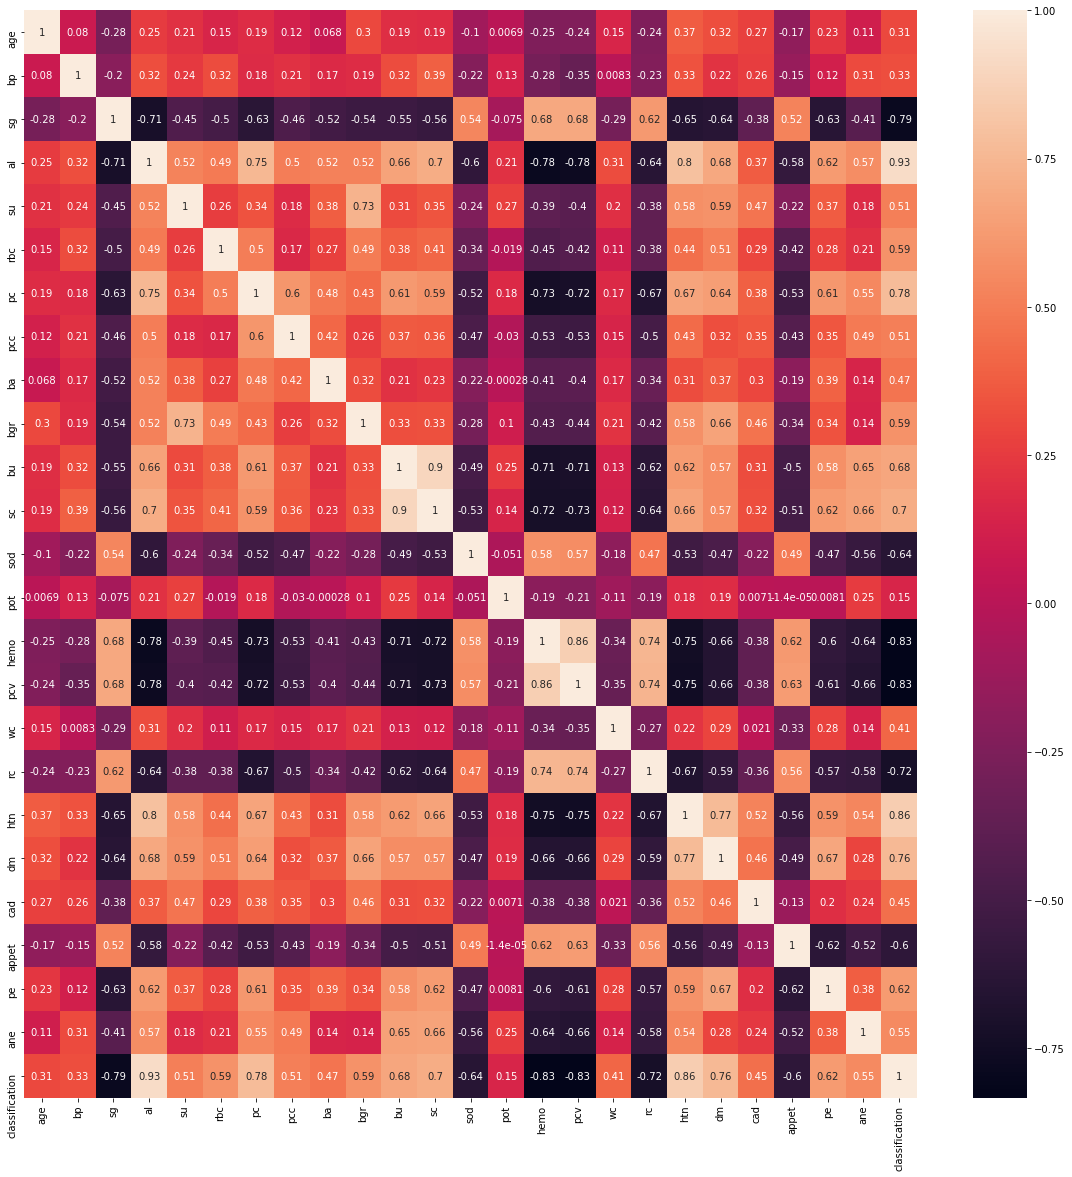

In [48]:
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

In [50]:
data.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.079712,-0.277303,0.253380,0.207711,0.147971,0.188907,0.124032,0.068353,0.301915,0.190636,0.189721,-0.102933,0.006866,-0.245645,-0.235116,0.153132,-0.242235,0.372348,0.323957,0.269868,-0.170259,0.232327,0.105809,0.305119
bp,0.079712,1.000000,-0.198897,0.322507,0.243828,0.316670,0.179834,0.206507,0.174555,0.190113,0.316287,0.386551,-0.224710,0.127801,-0.282365,-0.353504,0.008274,-0.228533,0.334951,0.218096,0.257709,-0.145047,0.117878,0.311097,0.326567
sg,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.500494,-0.630323,-0.460050,-0.516392,-0.544781,-0.545319,-0.563122,0.539285,-0.075057,0.682086,0.678472,-0.288930,0.619092,-0.648168,-0.639391,-0.379305,0.523944,-0.633622,-0.413252,-0.790102
al,0.253380,0.322507,-0.712331,1.000000,0.521448,0.489941,0.752956,0.503341,0.516104,0.518123,0.661940,0.702889,-0.599334,0.209492,-0.784745,-0.775528,0.314574,-0.640099,0.796876,0.678582,0.374755,-0.578080,0.622268,0.569529,0.925816
su,0.207711,0.243828,-0.448477,0.521448,1.000000,0.256568,0.335901,0.177327,0.381929,0.730050,0.312259,0.347196,-0.242491,0.271954,-0.385511,-0.404821,0.201000,-0.377726,0.577286,0.591010,0.466658,-0.220547,0.374128,0.179811,0.510615
rbc,0.147971,0.316670,-0.500494,0.489941,0.256568,1.000000,0.498959,0.168592,0.273177,0.493857,0.378478,0.410408,-0.344916,-0.019319,-0.452566,-0.422537,0.108857,-0.379378,0.442400,0.511777,0.293269,-0.418639,0.282868,0.209797,0.586391
pc,0.188907,0.179834,-0.630323,0.752956,0.335901,0.498959,1.000000,0.600092,0.481227,0.430646,0.613318,0.588517,-0.520324,0.176150,-0.733140,-0.718042,0.169936,-0.667113,0.666767,0.636288,0.384223,-0.528435,0.606234,0.545380,0.775388
pcc,0.124032,0.206507,-0.460050,0.503341,0.177327,0.168592,0.600092,1.000000,0.415033,0.257768,0.366726,0.361965,-0.473954,-0.030297,-0.531182,-0.534564,0.146742,-0.499401,0.432876,0.321900,0.352255,-0.432515,0.350171,0.485941,0.509915
ba,0.068353,0.174555,-0.516392,0.516104,0.381929,0.273177,0.481227,0.415033,1.000000,0.318095,0.205351,0.229238,-0.221374,-0.000279,-0.410353,-0.397500,0.170071,-0.343299,0.314961,0.367477,0.297063,-0.187815,0.393819,0.141344,0.468845
bgr,0.301915,0.190113,-0.544781,0.518123,0.730050,0.493857,0.430646,0.257768,0.318095,1.000000,0.326496,0.331284,-0.284968,0.102226,-0.434158,-0.443818,0.212093,-0.418085,0.579407,0.663012,0.459164,-0.338924,0.336141,0.139854,0.591217


In [52]:
x = data.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y = data['classification']

In [53]:
x.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [55]:
model=RandomForestClassifier(n_estimators=20)

In [56]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [57]:
y_predict=model.predict(x_test)

In [58]:
accuracy_score(y_test,y_predict)

1.0

In [61]:
pickle.dump(model,open("kidney.pkl","wb"))